IRIS FLOWER CLASSIFICATION ML Project

Importing the dataset and necesary modules

In [16]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [17]:
df = pd.read_csv("iris.data",header=None)
df.columns = ["SepalLength","SepalWidth","PetalLength",'PetalWidth','Class']
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Class          0
dtype: int64

Data Visualization

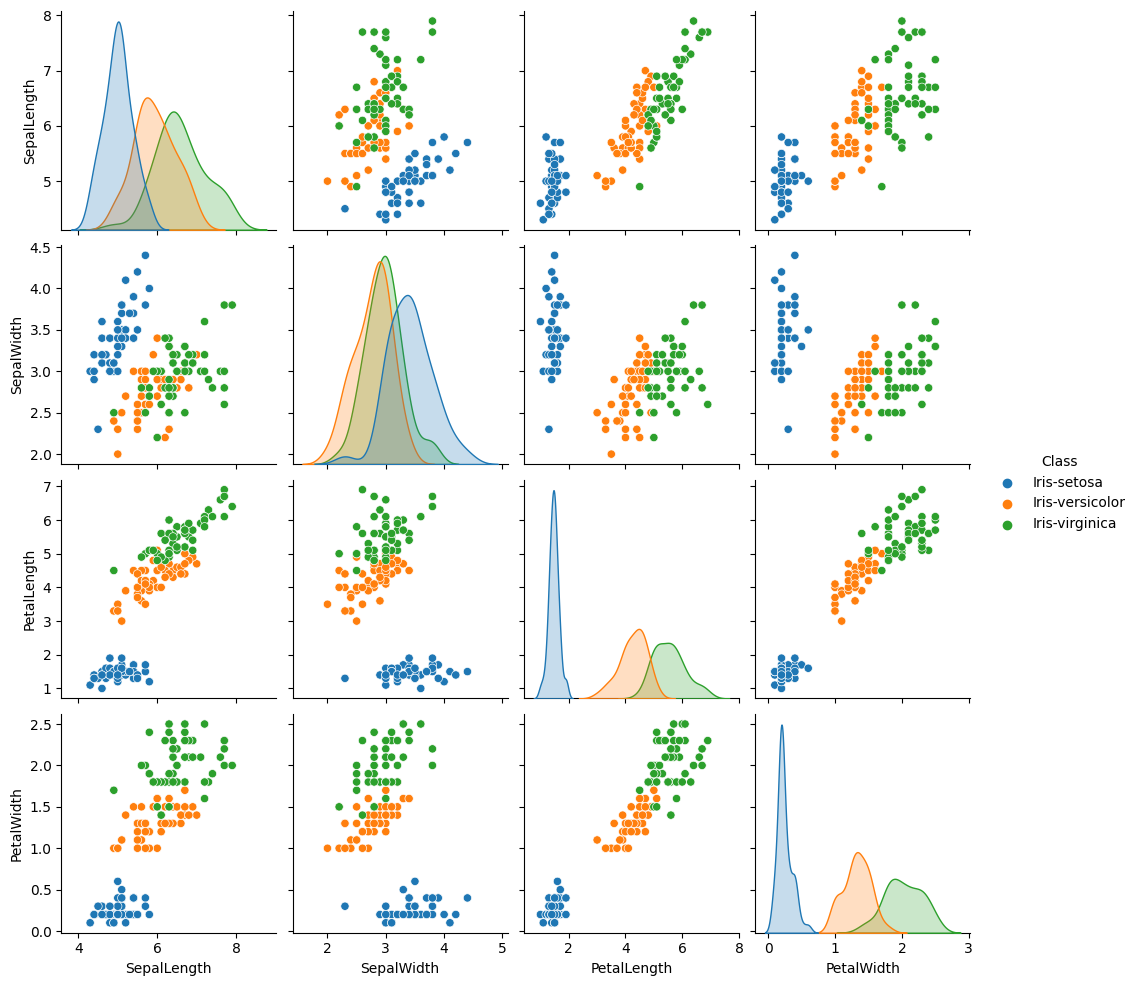

In [20]:
sns.pairplot(
    data=df,hue="Class"
);

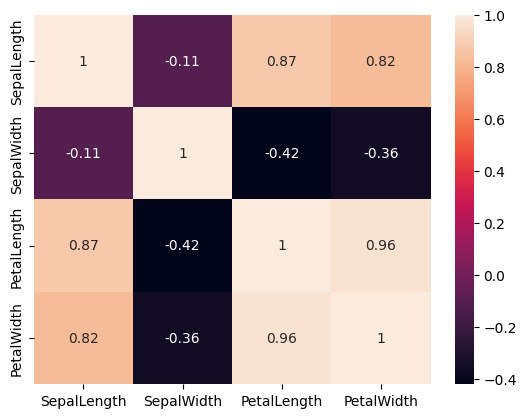

In [21]:
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
);

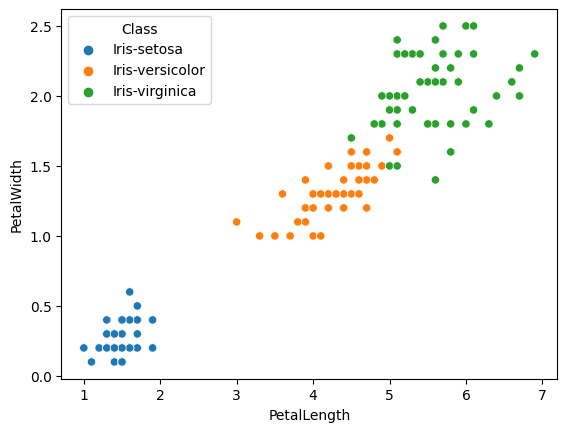

In [22]:
sns.scatterplot(
    data=df,
    x="PetalLength",
    y="PetalWidth",
    hue="Class"
);

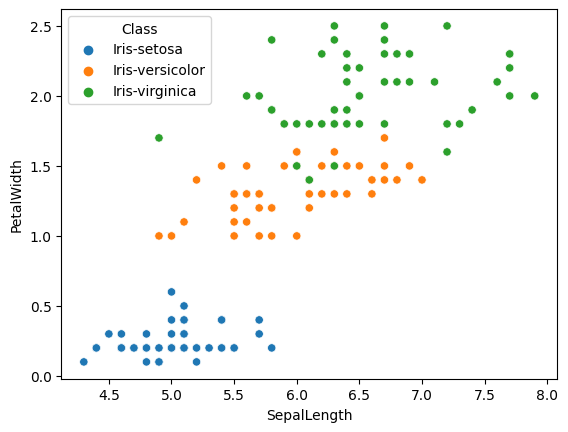

In [23]:
sns.scatterplot(
    data=df,
    x="SepalLength",
    y="PetalWidth",
    hue="Class"
);

Splitting of Training set and Test set

In [24]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Prediction using Different ML Classification Algorithms and comparing their accuracy scores

In [26]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10  0  0]
 [ 0 14  1]
 [ 0  0 13]]


0.9736842105263158

In [27]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10  0  0]
 [ 0 15  0]
 [ 0  2 11]]


0.9473684210526315

In [28]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10  0  0]
 [ 0 14  1]
 [ 0  0 13]]


0.9736842105263158

In [29]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10  0  0]
 [ 0 14  1]
 [ 0  2 11]]


0.9210526315789473

In [30]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10  0  0]
 [ 0 15  0]
 [ 0  2 11]]


0.9473684210526315

Logistic Regression and K-Nearest Neighbours give 100% accuracy for the given data